# 波の式のイメージ

$$
a(x, t) = A \sin(kx - \omega t + \phi) \hspace{30pt} (1) 
$$

ここで $A$ は振幅、$k$ は波数、$\omega$ は振動数、$\phi$ は位相を表します。

以下のコードでは波数、振動数、位相を変化させたときの波の形をアニメーションで描画します。



/tmp/ipykernel_38557/658814540.py:132: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig, animate, interval=50, blit=True)
/tmp/ipykernel_38557/658814540.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


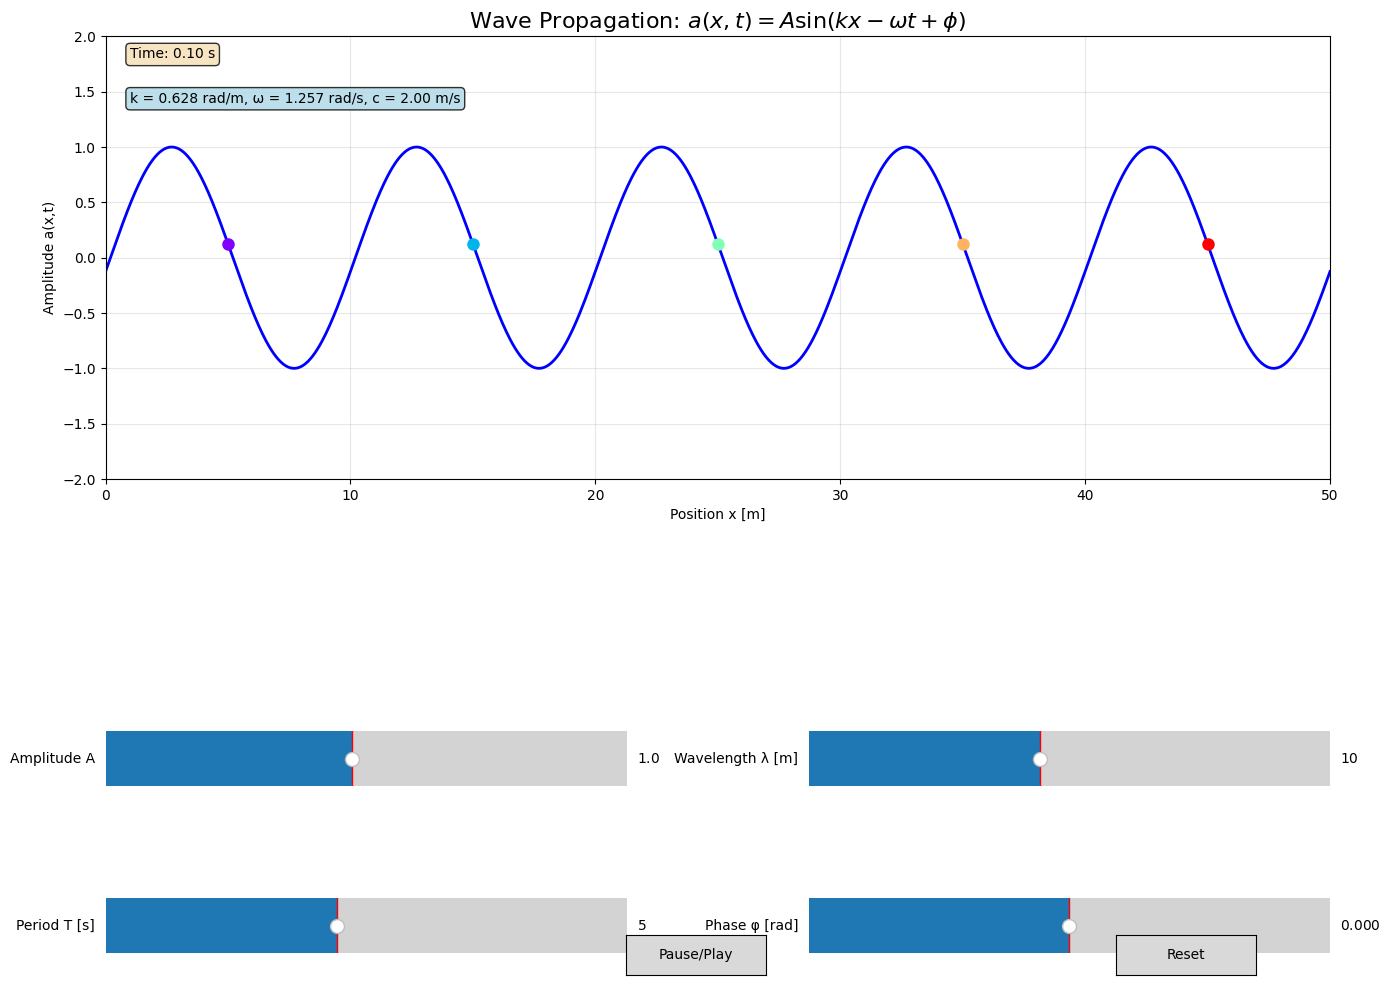

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import matplotlib.animation as animation

# インタラクティブな波動シミュレーション
# パラメータをスライダーで調整可能

# 初期パラメータ
init_A = 1.0          # 振幅
init_lambda = 10.0    # 波長
init_T = 5.0          # 周期
init_phi = 0.0        # 初期位相

# 計算される値
init_k = 2*np.pi/init_lambda    # 波数
init_omega = 2*np.pi/init_T     # 角周波数
init_c = init_lambda/init_T      # 位相速度

# プロット設定
fig = plt.figure(figsize=(14, 10))

# メインの波形表示エリア
ax_wave = plt.subplot2grid((6, 2), (0, 0), colspan=2, rowspan=3)
ax_wave.set_xlim(0, 50)
ax_wave.set_ylim(-2, 2)
ax_wave.set_xlabel('Position x [m]')
ax_wave.set_ylabel('Amplitude a(x,t)')
ax_wave.set_title('Wave Propagation: $a(x,t) = A \\sin(kx - \\omega t + \\phi)$', fontsize=16)
ax_wave.grid(True, alpha=0.3)

# 波形の線
x = np.linspace(0, 50, 1000)
line, = ax_wave.plot(x, np.sin(init_k*x), 'b-', linewidth=2)

# 複数の追跡点
n_points = 5
colors = plt.cm.rainbow(np.linspace(0, 1, n_points))
track_points = []
track_x = np.linspace(5, 45, n_points)
for i in range(n_points):
    point, = ax_wave.plot([], [], 'o', color=colors[i], markersize=8)
    track_points.append(point)

# 時間表示
time_text = ax_wave.text(0.02, 0.95, '', transform=ax_wave.transAxes,
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 波のパラメータ表示
param_text = ax_wave.text(0.02, 0.85, '', transform=ax_wave.transAxes,
                         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# スライダーの配置
ax_A = plt.subplot2grid((6, 2), (4, 0))
ax_lambda = plt.subplot2grid((6, 2), (4, 1))
ax_T = plt.subplot2grid((6, 2), (5, 0))
ax_phi = plt.subplot2grid((6, 2), (5, 1))

# スライダーの作成
slider_A = Slider(ax_A, 'Amplitude A', 0.1, 2.0, valinit=init_A, valstep=0.1)
slider_lambda = Slider(ax_lambda, 'Wavelength λ [m]', 2, 20, valinit=init_lambda, valstep=0.5)
slider_T = Slider(ax_T, 'Period T [s]', 1, 10, valinit=init_T, valstep=0.5)
slider_phi = Slider(ax_phi, 'Phase φ [rad]', -np.pi, np.pi, valinit=init_phi, valstep=np.pi/12)

# アニメーション用の変数
t = 0
dt = 0.05
is_paused = False

# スライダー更新時の処理
def update(val):
    global init_A, init_lambda, init_T, init_phi, init_k, init_omega, init_c
    init_A = slider_A.val
    init_lambda = slider_lambda.val
    init_T = slider_T.val
    init_phi = slider_phi.val
    init_k = 2*np.pi/init_lambda
    init_omega = 2*np.pi/init_T
    init_c = init_lambda/init_T

slider_A.on_changed(update)
slider_lambda.on_changed(update)
slider_T.on_changed(update)
slider_phi.on_changed(update)

# アニメーション関数
def animate(frame):
    global t
    if not is_paused:
        t += dt
    
    # 波形の更新
    y = init_A * np.sin(init_k*x - init_omega*t + init_phi)
    line.set_ydata(y)
    
    # 追跡点の更新
    for i, (point, x_pos) in enumerate(zip(track_points, track_x)):
        y_pos = init_A * np.sin(init_k*x_pos - init_omega*t + init_phi)
        point.set_data([x_pos], [y_pos])
    
    # テキストの更新
    time_text.set_text(f'Time: {t:.2f} s')
    param_text.set_text(f'k = {init_k:.3f} rad/m, ω = {init_omega:.3f} rad/s, c = {init_c:.2f} m/s')
    
    return [line] + track_points + [time_text, param_text]

# 一時停止ボタン
ax_button = plt.axes([0.45, 0.02, 0.1, 0.04])
button = Button(ax_button, 'Pause/Play')

def toggle_pause(event):
    global is_paused
    is_paused = not is_paused

button.on_clicked(toggle_pause)

# リセットボタン
ax_reset = plt.axes([0.8, 0.02, 0.1, 0.04])
reset_button = Button(ax_reset, 'Reset')

def reset(event):
    global t
    t = 0
    slider_A.reset()
    slider_lambda.reset()
    slider_T.reset()
    slider_phi.reset()

reset_button.on_clicked(reset)

# アニメーションの開始
anim = animation.FuncAnimation(fig, animate, interval=50, blit=True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import cm
from IPython.display import HTML

# 3次元空間での波の伝播
# a(r,t) = A * sin(k·r - ωt + φ)

# ハードコードされたパラメータ
A = 1.0                    # 振幅
kx = 0.5                   # x方向の波数成分
ky = 0.3                   # y方向の波数成分
kz = 0.0                   # z方向の波数成分（表面波を想定）
omega = 2.0                # 角周波数
phi = 0.0                  # 初期位相

# 波数ベクトルの大きさと波長
k_magnitude = np.sqrt(kx**2 + ky**2 + kz**2)
wavelength = 2 * np.pi / k_magnitude
period = 2 * np.pi / omega
phase_velocity = omega / k_magnitude

print(f"Wave parameters:")
print(f"  Wave vector: k = ({kx:.2f}, {ky:.2f}, {kz:.2f})")
print(f"  Wavelength: λ = {wavelength:.2f}")
print(f"  Period: T = {period:.2f}")
print(f"  Phase velocity: c = {phase_velocity:.2f}")
print(f"  Propagation direction: ({kx/k_magnitude:.2f}, {ky/k_magnitude:.2f}, {kz/k_magnitude:.2f})")

# 3Dグリッドの作成
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)  # 表面（z=0）での波

# 時間ステップ
dt = 0.1
n_frames = 50

# 図の準備
fig = plt.figure(figsize=(16, 12))

# 1. 3D表面プロット
ax1 = fig.add_subplot(221, projection='3d')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Amplitude')
ax1.set_title('3D Wave Surface')
ax1.set_zlim(-1.5, 1.5)

# 2. 上面図（コンタープロット）
ax2 = fig.add_subplot(222)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Top View (Contour)')
ax2.set_aspect('equal')

# 3. X-Y断面での波形
ax3 = fig.add_subplot(223)
ax3.set_xlabel('Position along wave direction')
ax3.set_ylabel('Amplitude')
ax3.set_title('Wave Profile')
ax3.set_ylim(-1.5, 1.5)
ax3.grid(True, alpha=0.3)

# 4. 波の伝播方向の表示
ax4 = fig.add_subplot(224)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_title('Wave Propagation Direction')
ax4.set_aspect('equal')
ax4.set_xlim(-10, 10)
ax4.set_ylim(-10, 10)

# 波の伝播方向ベクトル
ax4.quiver(0, 0, kx/k_magnitude*5, ky/k_magnitude*5, 
           angles='xy', scale_units='xy', scale=1, 
           width=0.01, headwidth=3, headlength=4, 
           color='red', label='Wave vector')
ax4.grid(True, alpha=0.3)
ax4.legend()

# アニメーション用の初期化
surf = None
cont = None
line_profiles = []
time_text = fig.text(0.5, 0.95, '', ha='center', fontsize=14)

def init():
    return []

def animate(frame):
    global surf, cont, line_profiles
    
    t = frame * dt
    
    # 3D波動場の計算
    # a(x,y,z,t) = A * sin(kx*x + ky*y + kz*z - omega*t + phi)
    wave_field = A * np.sin(kx*X + ky*Y + kz*Z - omega*t + phi)
    
    # 1. 3D表面プロットの更新
    ax1.clear()
    surf = ax1.plot_surface(X, Y, wave_field, cmap=cm.coolwarm,
                           vmin=-1.5, vmax=1.5, alpha=0.8,
                           linewidth=0, antialiased=True)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Amplitude')
    ax1.set_title('3D Wave Surface')
    ax1.set_zlim(-1.5, 1.5)
    
    # 2. コンタープロットの更新
    ax2.clear()
    levels = np.linspace(-1, 1, 21)
    cont = ax2.contourf(X, Y, wave_field, levels=levels, cmap=cm.coolwarm)
    ax2.contour(X, Y, wave_field, levels=levels[::4], colors='black', alpha=0.3, linewidths=0.5)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Top View (Contour)')
    ax2.set_aspect('equal')
    
    # 波面（等位相面）を表示
    phase_lines = np.arange(-3, 3) * wavelength
    for phase_line in phase_lines:
        # 波面の方程式: kx*x + ky*y = omega*t + phase_line
        if abs(ky) > 0.01:
            x_line = np.linspace(-10, 10, 100)
            y_line = (omega*t + phase_line - kx*x_line) / ky
            mask = (y_line >= -10) & (y_line <= 10)
            ax2.plot(x_line[mask], y_line[mask], 'k--', alpha=0.5, linewidth=1)
    
    # 3. 波の伝播方向に沿った断面
    ax3.clear()
    # 伝播方向に沿った座標
    s = np.linspace(-15, 15, 200)
    x_profile = s * kx / k_magnitude
    y_profile = s * ky / k_magnitude
    # 座標が範囲内にあるものだけを使用
    mask = (np.abs(x_profile) <= 10) & (np.abs(y_profile) <= 10)
    s_masked = s[mask]
    wave_profile = A * np.sin(k_magnitude * s_masked - omega * t + phi)
    
    ax3.plot(s_masked, wave_profile, 'b-', linewidth=2)
    ax3.set_xlabel('Position along wave direction')
    ax3.set_ylabel('Amplitude')
    ax3.set_title('Wave Profile')
    ax3.set_ylim(-1.5, 1.5)
    ax3.grid(True, alpha=0.3)
    
    # 時刻表示
    time_text.set_text(f'Time: {t:.1f} s')
    
    return [surf, time_text]

# アニメーションの作成
anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=n_frames, interval=100,
                              blit=False, repeat=True)

plt.tight_layout()
plt.show()

# Jupyter notebook用にHTMLとして表示
HTML(anim.to_jshtml())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import cm

# よりシンプルな3D波動可視化
# 波が3次元空間をどのように伝播するかを直感的に理解

# パラメータ設定（ハードコード）
A = 1.0                    # 振幅
kx = 0.4                   # x方向の波数
ky = 0.2                   # y方向の波数
kz = 0.0                   # z方向の波数（0 = 水平伝播）
omega = 1.5                # 角周波数
phi = 0.0                  # 初期位相

# 導出される値
k_mag = np.sqrt(kx**2 + ky**2 + kz**2)
wavelength = 2*np.pi/k_mag
period = 2*np.pi/omega
c = omega/k_mag

# 伝播方向の角度
theta = np.arctan2(ky, kx) * 180/np.pi

print("=== 3D波動パラメータ ===")
print(f"波数ベクトル: k = ({kx:.2f}, {ky:.2f}, {kz:.2f}) [rad/m]")
print(f"波長: λ = {wavelength:.2f} m")
print(f"周期: T = {period:.2f} s")
print(f"位相速度: c = {c:.2f} m/s")
print(f"伝播方向: {theta:.1f}° (x軸から)")

# インタラクティブな3D可視化
fig = plt.figure(figsize=(15, 10))

# メインの3Dプロット
ax = fig.add_subplot(111, projection='3d')

# グリッドの作成
x = np.linspace(-15, 15, 60)
y = np.linspace(-15, 15, 60)
X, Y = np.meshgrid(x, y)

# 時間パラメータ
times = np.linspace(0, period*2, 60)
dt = times[1] - times[0]

# カラーマップ
cmap = cm.coolwarm

def update_plot(frame):
    ax.clear()
    
    t = times[frame % len(times)]
    
    # 波動場の計算
    Z = A * np.sin(kx*X + ky*Y - omega*t + phi)
    
    # 3D表面プロット
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, 
                          vmin=-1.2, vmax=1.2,
                          alpha=0.9, 
                          linewidth=0, 
                          antialiased=True,
                          rcount=50, ccount=50)
    
    # 波面（等位相面）の等高線を底面に投影
    ax.contour(X, Y, Z, zdir='z', offset=-1.5, 
               levels=np.linspace(-1, 1, 11), 
               cmap=cmap, alpha=0.5)
    
    # 伝播方向を示す矢印
    arrow_start = [-5, -5, 0]
    arrow_direction = [5*kx/k_mag, 5*ky/k_mag, 5*kz/k_mag]
    ax.quiver(arrow_start[0], arrow_start[1], arrow_start[2],
              arrow_direction[0], arrow_direction[1], arrow_direction[2],
              color='red', arrow_length_ratio=0.2, linewidth=3)
    
    # 軸の設定
    ax.set_xlabel('X [m]', fontsize=12)
    ax.set_ylabel('Y [m]', fontsize=12)
    ax.set_zlabel('Amplitude', fontsize=12)
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_zlim(-1.5, 1.5)
    
    # タイトルに時刻と位相情報を表示
    phase_info = (omega*t - phi) % (2*np.pi)
    ax.set_title(f'3D Wave Propagation\nTime: {t:.2f}s, Phase: {phase_info:.2f} rad', 
                fontsize=14)
    
    # 視点の設定（アニメーション中に回転）
    ax.view_init(elev=30, azim=frame*2)
    
    return [surf]

# アニメーション作成
anim = animation.FuncAnimation(fig, update_plot, frames=120, 
                              interval=50, blit=False)

plt.tight_layout()
plt.show()

# 静的な3D波動場の可視化（異なる時刻のスナップショット）
fig2, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})
axes = axes.flatten()

time_points = [0, period/4, period/2, 3*period/4]
titles = ['t = 0', f't = T/4 = {period/4:.2f}s', 
          f't = T/2 = {period/2:.2f}s', f't = 3T/4 = {3*period/4:.2f}s']

for idx, (ax, t, title) in enumerate(zip(axes, time_points, titles)):
    # 波動場の計算
    Z = A * np.sin(kx*X + ky*Y - omega*t + phi)
    
    # 表面プロット
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, 
                          vmin=-1.2, vmax=1.2,
                          alpha=0.8, 
                          linewidth=0, 
                          antialiased=True)
    
    # 等高線
    ax.contour(X, Y, Z, zdir='z', offset=-1.5, 
               levels=np.linspace(-1, 1, 11), 
               cmap=cmap, alpha=0.5, linewidths=0.5)
    
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    ax.set_zlabel('Amplitude')
    ax.set_title(title)
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_zlim(-1.5, 1.5)
    ax.view_init(elev=25, azim=45)

plt.suptitle('Wave Snapshots at Different Times', fontsize=16)
plt.tight_layout()
plt.show()